## Project: Time Series Analysis on temperature 2021-2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")


# Import the relevant sklearn packages
from statsmodels.api import OLS, add_constant
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Set figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)
plt.rcParams['font.size'] = '14'

In [2]:
df= pd.read_csv('TG_STAID002759.csv',sep=',',skiprows=19, parse_dates=True, index_col=1, skipinitialspace=True)
df

,SOUID,TG,Q_TG
DATE,,,
1876-01-01,127488,22,0
1876-01-02,127488,25,0
1876-01-03,127488,3,0
1876-01-04,127488,-58,0
1876-01-05,127488,-98,0
...,...,...,...
2022-12-27,111448,42,0
2022-12-28,111448,63,0
2022-12-29,111448,100,0


In [3]:
df = df.drop(['SOUID', 'Q_TG'], axis=1)

In [4]:
df = df.rename(columns={'TG': 'mean_temp'})

In [5]:
df.loc[:] *=0.1

In [6]:
df

,mean_temp
DATE,
1876-01-01,2.2
1876-01-02,2.5
1876-01-03,0.3
1876-01-04,-5.8
1876-01-05,-9.8
...,...
2022-12-27,4.2
2022-12-28,6.3
2022-12-29,10.0


In [7]:
# select rows within the date range '2021-01-01' to '2022-12-31'
start_date = '2021-01-01'
end_date = '2022-12-31'
df = df.loc[start_date:end_date]

In [8]:
df

,mean_temp
DATE,
2021-01-01,2.1
2021-01-02,1.1
2021-01-03,0.6
2021-01-04,0.8
2021-01-05,1.7
...,...
2022-12-27,4.2
2022-12-28,6.3
2022-12-29,10.0


### Train-Validation split

In [9]:
df_train = df[:-365]

df_test = df[-365:]

### EDA

In [10]:
def plot_meantemp(df, title='Daily mean temperature since 2021', ylim=True):
    df.plot()
    plt.title(title)
    plt.ylabel('# of mean temperature in C')
    if ylim:
        plt.ylim(ymin=0)
    plt.show()

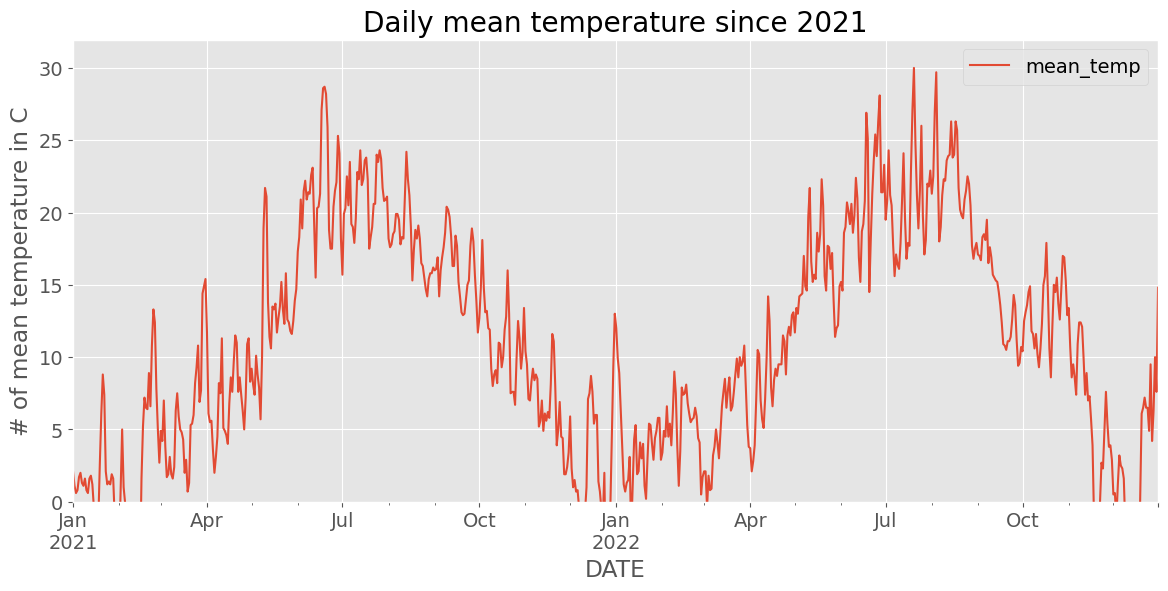

In [11]:
plot_meantemp(df)

### Model the trend

In [12]:
# Create a monthly column for the trend
df['month'] = df.index.month
df.head()

C:\Users\helge\AppData\Local\Temp\ipykernel_35084\1361599323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


,mean_temp,month
DATE,,
2021-01-01,2.1,1
2021-01-02,1.1,1
2021-01-03,0.6,1
2021-01-04,0.8,1
2021-01-05,1.7,1


In [13]:
# Create a timestep variable
df['timestep'] = list(range(len(df)))
df.head()

C:\Users\helge\AppData\Local\Temp\ipykernel_35084\2799109993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestep'] = list(range(len(df)))


,mean_temp,month,timestep
DATE,,,
2021-01-01,2.1,1,0
2021-01-02,1.1,1,1
2021-01-03,0.6,1,2
2021-01-04,0.8,1,3
2021-01-05,1.7,1,4


In [14]:
# Run a Linear Regression
m = LinearRegression()
X = df[['timestep']]
y = df.mean_temp
m.fit(X, y)

LinearRegression()

### Plot the trend and the original data

In [15]:
# Use the model to make a prediction
df['trend'] = m.predict(X)
df.head(15)

C:\Users\helge\AppData\Local\Temp\ipykernel_35084\1992350723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trend'] = m.predict(X)


,mean_temp,month,timestep,trend
DATE,,,,
2021-01-01,2.1,1,0,8.988558
2021-01-02,1.1,1,1,8.994183
2021-01-03,0.6,1,2,8.999809
2021-01-04,0.8,1,3,9.005434
2021-01-05,1.7,1,4,9.011060
2021-01-06,2.0,1,5,9.016685
2021-01-07,1.3,1,6,9.022311
2021-01-08,1.1,1,7,9.027936
2021-01-09,1.6,1,8,9.033562


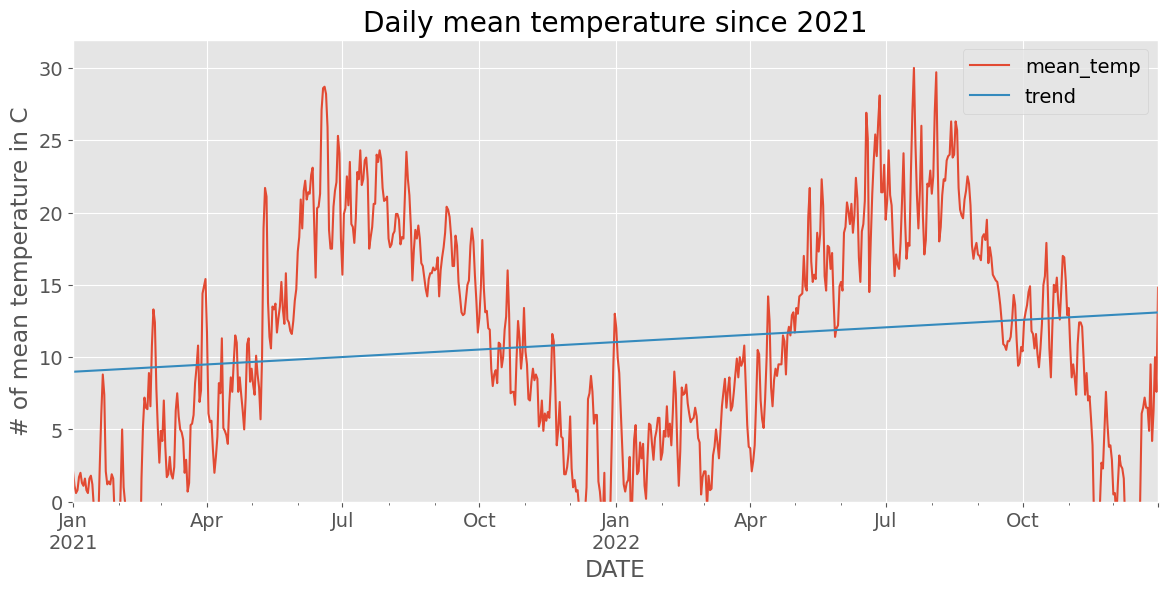

In [16]:
plot_meantemp(df[['mean_temp', 'trend']])

In [17]:
import plotly.express as px
px.scatter(df[['mean_temp','trend']])

In [18]:
m.intercept_,m.coef_

(8.988557989618277, array([0.00562547]))

### Model the seasonality

In [19]:
pd.get_dummies(df.month,prefix='month')

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,
2021-01-01,1,0,0,0,0,0,0,0,0,0,0,0
2021-01-02,1,0,0,0,0,0,0,0,0,0,0,0
2021-01-03,1,0,0,0,0,0,0,0,0,0,0,0
2021-01-04,1,0,0,0,0,0,0,0,0,0,0,0
2021-01-05,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,0,0,0,0,0,0,0,0,0,0,0,1
2022-12-28,0,0,0,0,0,0,0,0,0,0,0,1
2022-12-29,0,0,0,0,0,0,0,0,0,0,0,1


In [20]:
# One-Hot-Encoding the month
seasonal_dummies = pd.get_dummies(df.month,prefix='month')
# sklearn.preprocessing.OneHotEncoder

df = df.join(seasonal_dummies)

In [21]:
# Define X and y
X = df.drop(columns=['mean_temp', 'month', 'trend'])

In [22]:
m.fit(X, y)

LinearRegression()

In [23]:
# Create a model with trend and seasonality
df['trend_seasonal'] = m.predict(X)
df.head()

,mean_temp,month,timestep,trend,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal
DATE,,,,,,,,,,,,,,,,,
2021-01-01,2.1,1,0,8.988558,1,0,0,0,0,0,0,0,0,0,0,0,1.952169
2021-01-02,1.1,1,1,8.994183,1,0,0,0,0,0,0,0,0,0,0,0,1.955253
2021-01-03,0.6,1,2,8.999809,1,0,0,0,0,0,0,0,0,0,0,0,1.958338
2021-01-04,0.8,1,3,9.005434,1,0,0,0,0,0,0,0,0,0,0,0,1.961422
2021-01-05,1.7,1,4,9.011060,1,0,0,0,0,0,0,0,0,0,0,0,1.964506


### Plot the original data and the trend

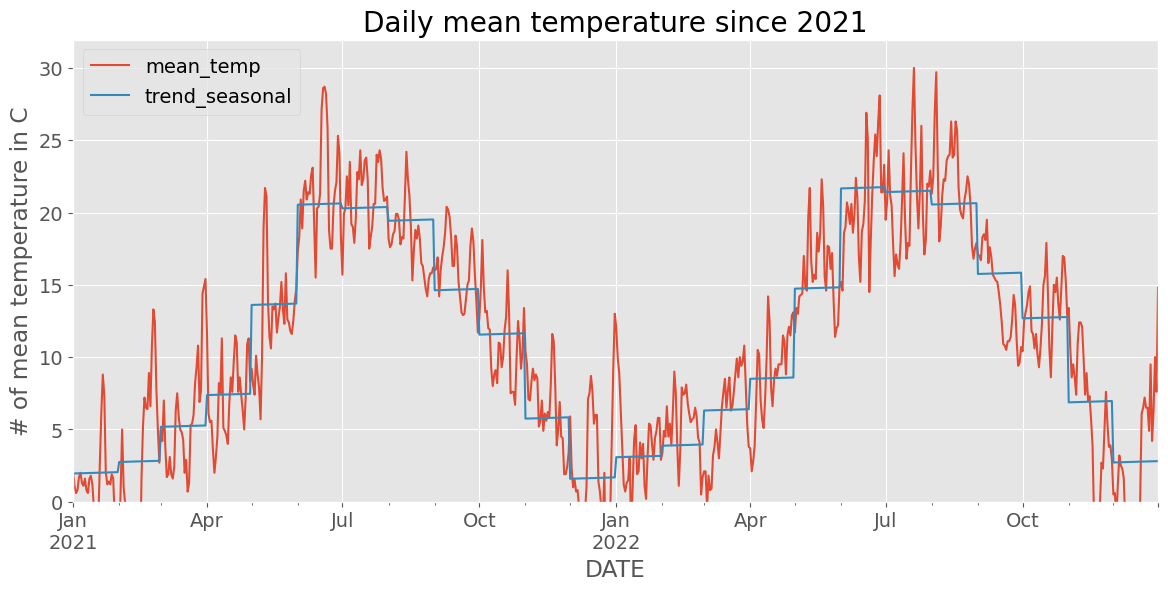

In [24]:
plot_meantemp(df[['mean_temp', 'trend_seasonal']])

### Extract the remainder

In [25]:
# We want to extract the part of the model that the trend_seasonal is not able to explain
df['remainder'] = df.mean_temp - df.trend_seasonal

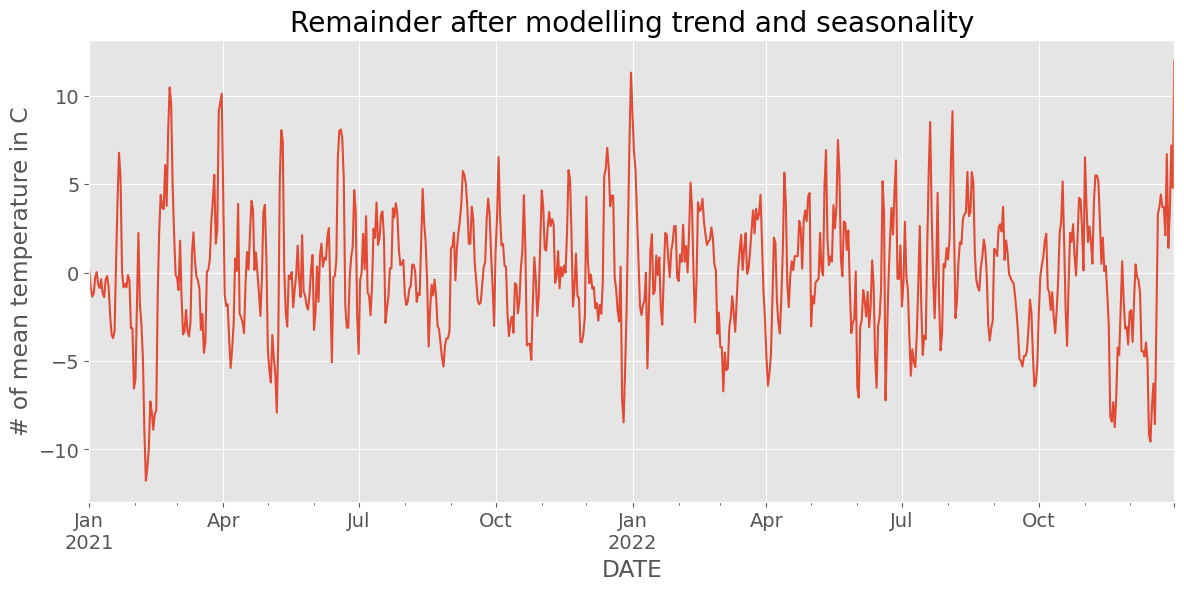

In [26]:
plot_meantemp(df['remainder'], title='Remainder after modelling trend and seasonality', ylim=False)

In [27]:
df['remainder'].mean(), df.remainder.std()

(-1.2118160356456503e-15, 3.5170077951332432)

In [29]:
random_array = np.random.normal(loc=0, scale=10, size=730)
df['random'] = random_array

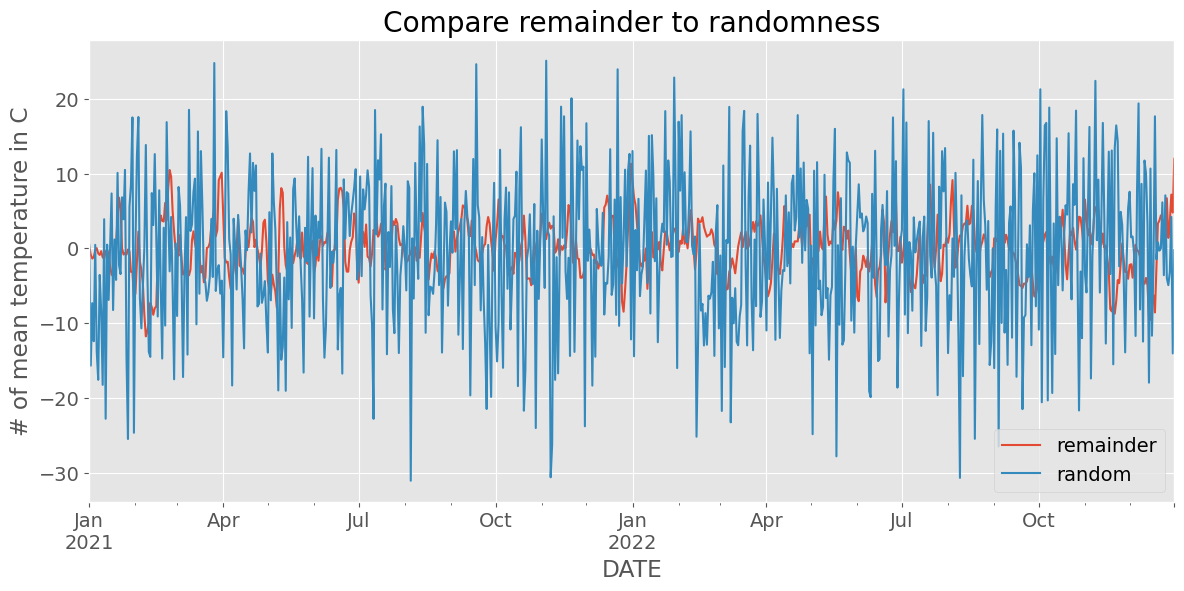

In [30]:
plot_meantemp(df[['remainder', 'random']], title='Compare remainder to randomness', ylim=False)

In [31]:
df['remainder'].to_csv('temperature_remainder_2021.csv')

In [32]:
df_rem = pd.read_csv('temperature_remainder_2021.csv', index_col=0, parse_dates=True)
df_rem.head()

,remainder
DATE,
2021-01-01,0.147831
2021-01-02,-0.855253
2021-01-03,-1.358338
2021-01-04,-1.161422
2021-01-05,-0.264506


In [33]:
# Plot the data
def plot_remainder(df_rem, title='Remaining Temperature after Extracting Trend and Seasonality'):
    df_rem.plot()
    plt.title(title)
    plt.ylabel('# of mean temperature in C')
    plt.show()

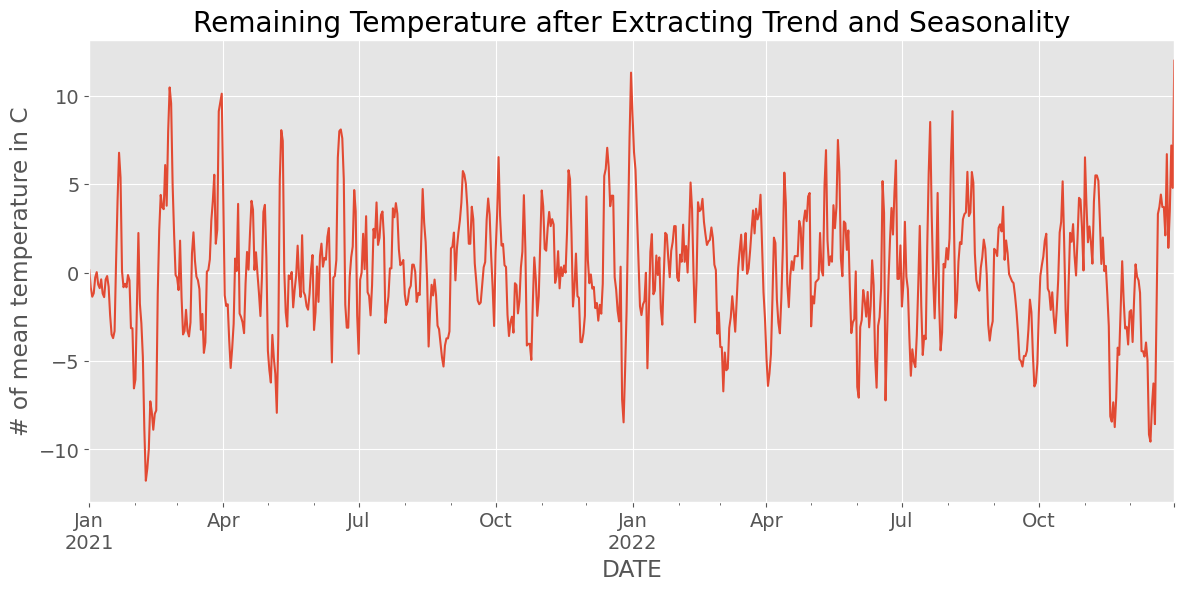

In [34]:
plot_remainder(df_rem['remainder'])

### Create a time-lagged input feature: lag1

In [35]:
df_rem

,remainder
DATE,
2021-01-01,0.147831
2021-01-02,-0.855253
2021-01-03,-1.358338
2021-01-04,-1.161422
2021-01-05,-0.264506
...,...
2022-12-27,1.404829
2022-12-28,3.501744
2022-12-29,7.198660


In [36]:
df_rem['lag1'] = df_rem['remainder'].shift(1)

df_rem

,remainder,lag1
DATE,,
2021-01-01,0.147831,NaN
2021-01-02,-0.855253,0.147831
2021-01-03,-1.358338,-0.855253
2021-01-04,-1.161422,-1.358338
2021-01-05,-0.264506,-1.161422
...,...,...
2022-12-27,1.404829,6.707913
2022-12-28,3.501744,1.404829
2022-12-29,7.198660,3.501744


In [37]:
df_rem.corr()

,remainder,lag1
remainder,1.000000,0.773757
lag1,0.773757,1.000000


### Plot remainder against lag1

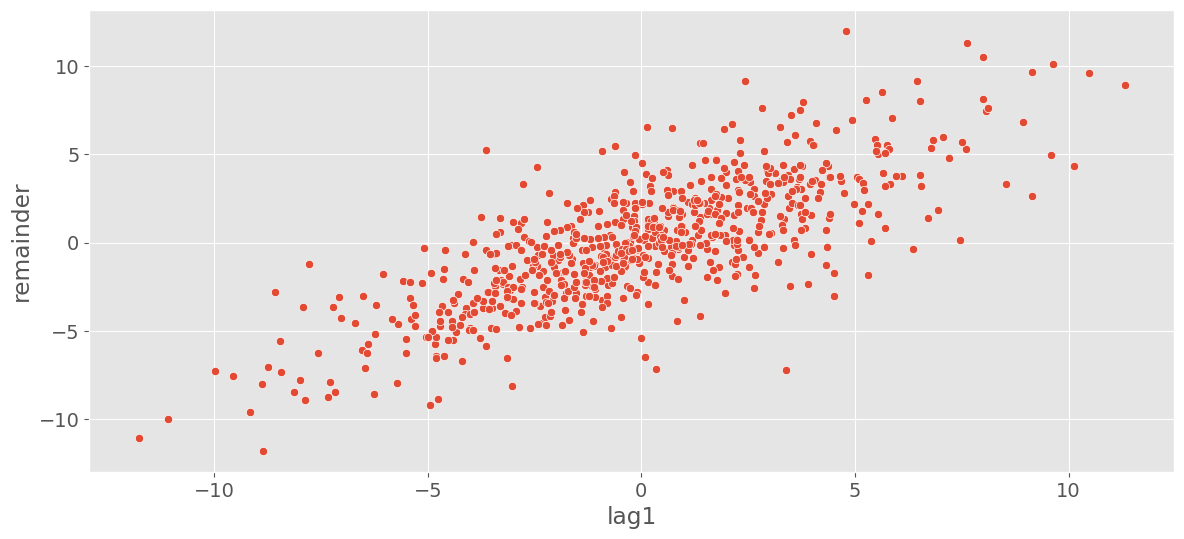

In [38]:
sns.scatterplot(x='lag1', y='remainder', data=df_rem);

### Run an Autoregression (Linear Regression) of lag1 on the remainder

In [39]:
# Drop missing values
df_rem.dropna(inplace=True)
df_rem.head()

,remainder,lag1
DATE,,
2021-01-02,-0.855253,0.147831
2021-01-03,-1.358338,-0.855253
2021-01-04,-1.161422,-1.358338
2021-01-05,-0.264506,-1.161422
2021-01-06,0.032410,-0.264506


In [40]:
# Assign X and y
X = df_rem[['lag1']]
y = df_rem['remainder']

In [41]:
# Create and fit the model
m = LinearRegression()
m.fit(X, y)

LinearRegression()

In [42]:
# Create predictions
df_rem['predictions_ar1'] = m.predict(X)
df_rem.head()

,remainder,lag1,predictions_ar1
DATE,,,
2021-01-02,-0.855253,0.147831,0.127938
2021-01-03,-1.358338,-0.855253,-0.654477
2021-01-04,-1.161422,-1.358338,-1.046888
2021-01-05,-0.264506,-1.161422,-0.893292
2021-01-06,0.032410,-0.264506,-0.193688


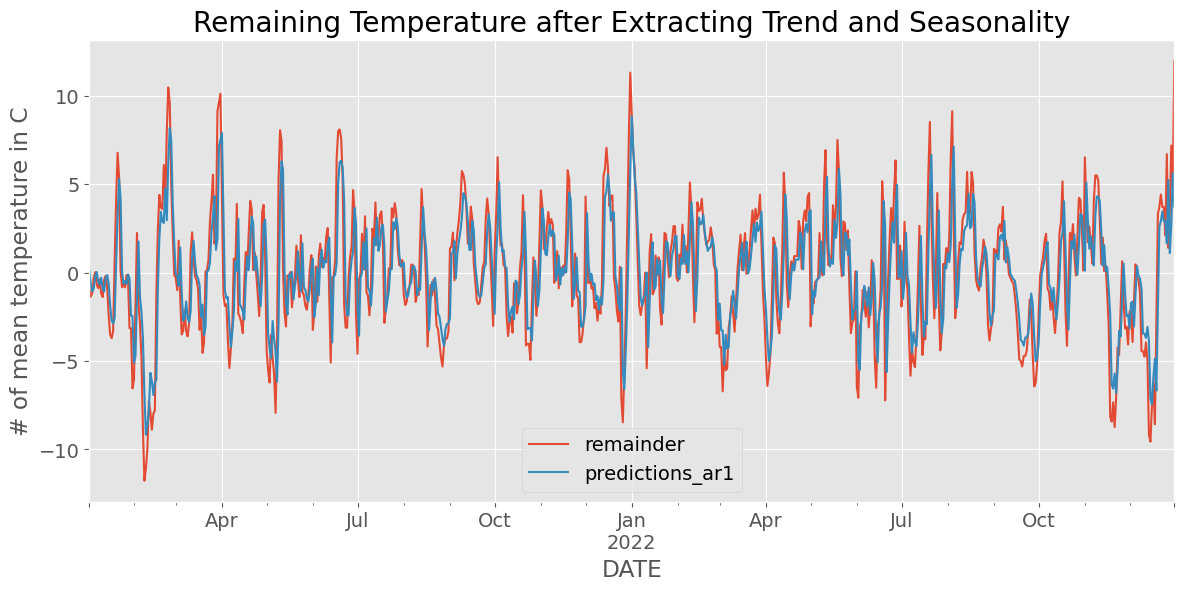

In [43]:
# Plot the original remainder and the prediction
plot_remainder(df_rem[['remainder', 'predictions_ar1']])

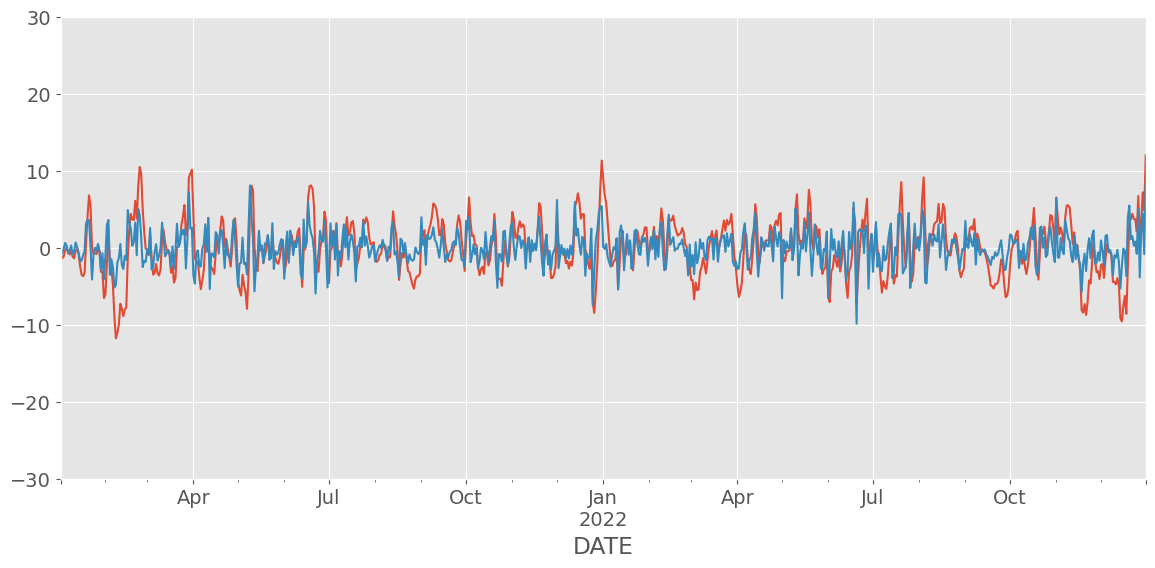

In [44]:
# Is the remainder prediction error smaller than the remainder itself?
df_rem['remainder'].plot(ylim=[-30,30])
(df_rem['remainder'] - df_rem['predictions_ar1']).plot(ylim=[-30,30]);

### Should we add another lag (lag2)?

In [45]:
df_rem['lag2'] = df_rem['remainder'].shift(2)
df_rem['lag3'] = df_rem['remainder'].shift(3)

df_rem.head()

,remainder,lag1,predictions_ar1,lag2,lag3
DATE,,,,,
2021-01-02,-0.855253,0.147831,0.127938,NaN,NaN
2021-01-03,-1.358338,-0.855253,-0.654477,NaN,NaN
2021-01-04,-1.161422,-1.358338,-1.046888,-0.855253,NaN
2021-01-05,-0.264506,-1.161422,-0.893292,-1.358338,-0.855253
2021-01-06,0.032410,-0.264506,-0.193688,-1.161422,-1.358338


In [46]:
round(df_rem[['remainder', 'lag1', 'lag2','lag3']].corr(), 2)

,remainder,lag1,lag2,lag3
remainder,1.00,0.77,0.50,0.31
lag1,0.77,1.00,0.77,0.50
lag2,0.50,0.77,1.00,0.77
lag3,0.31,0.50,0.77,1.00


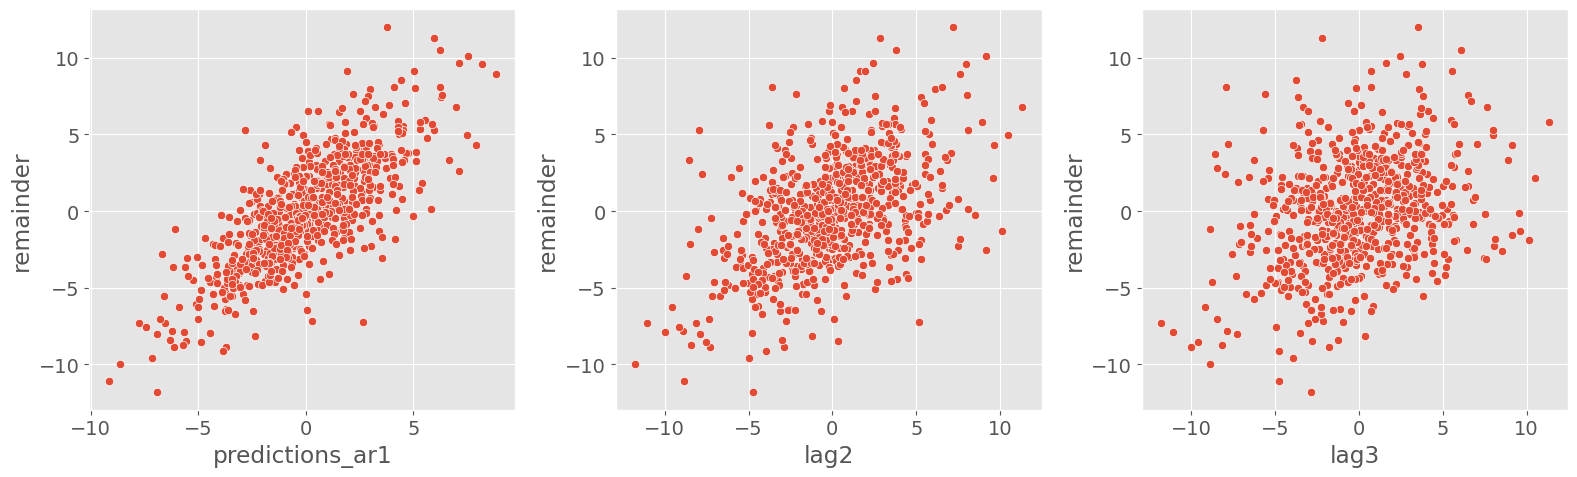

In [47]:
import matplotlib.gridspec as gridspec
#sns.set() # set seaborn as default style
p=3
lag_columns = df_rem.columns[-p:]
fig, axes = plt.subplots(1,p, figsize=(16,5),dpi=100)
gs = gridspec.GridSpec(1,p)

for i in range(p):
    sns.scatterplot(x=df_rem[lag_columns[i]],y=df_rem['remainder'],ax=axes[i])
    
plt.tight_layout()

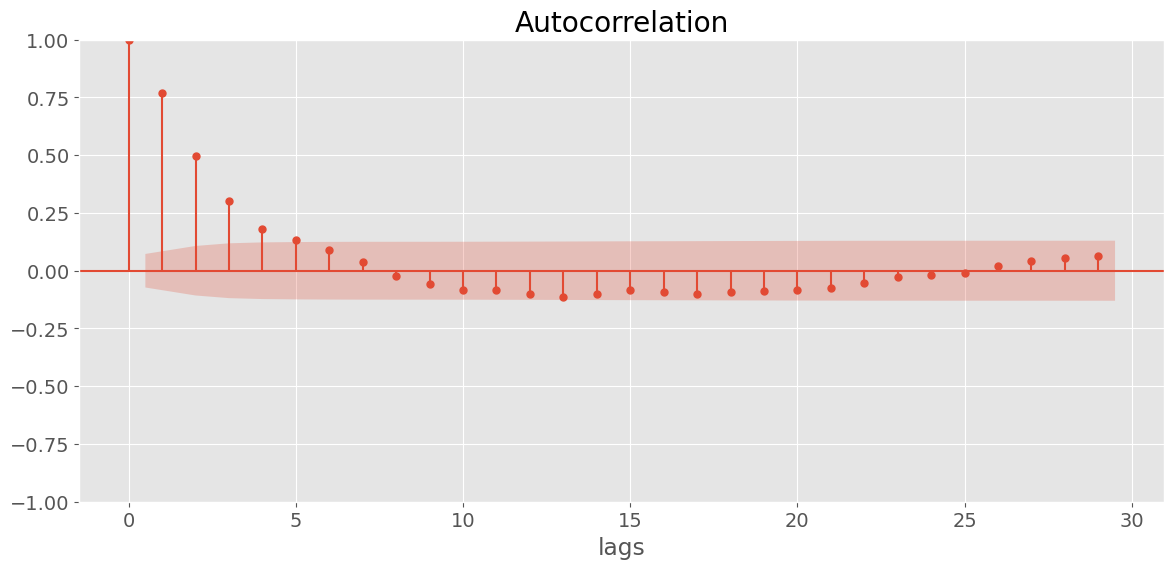

In [48]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_rem['remainder'])
plt.xlabel('lags');

In [50]:
# white noise or random noise
import numpy as np
random_array = np.random.normal(loc=0, scale=10, size=729)
df_rem['random'] = random_array

<AxesSubplot: xlabel='DATE'>

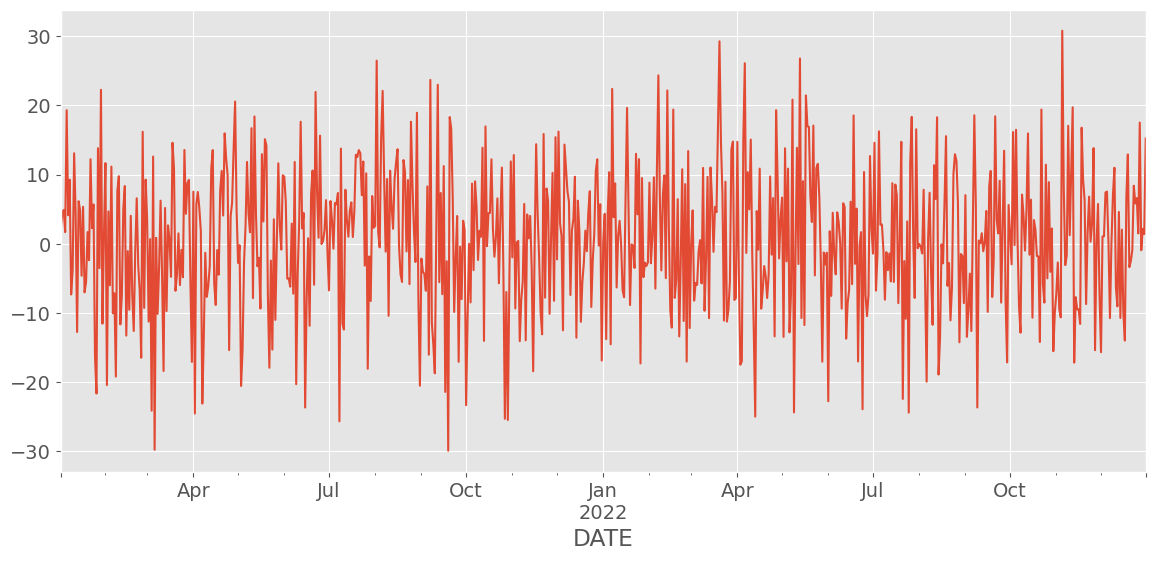

In [51]:
df_rem['random'].plot()

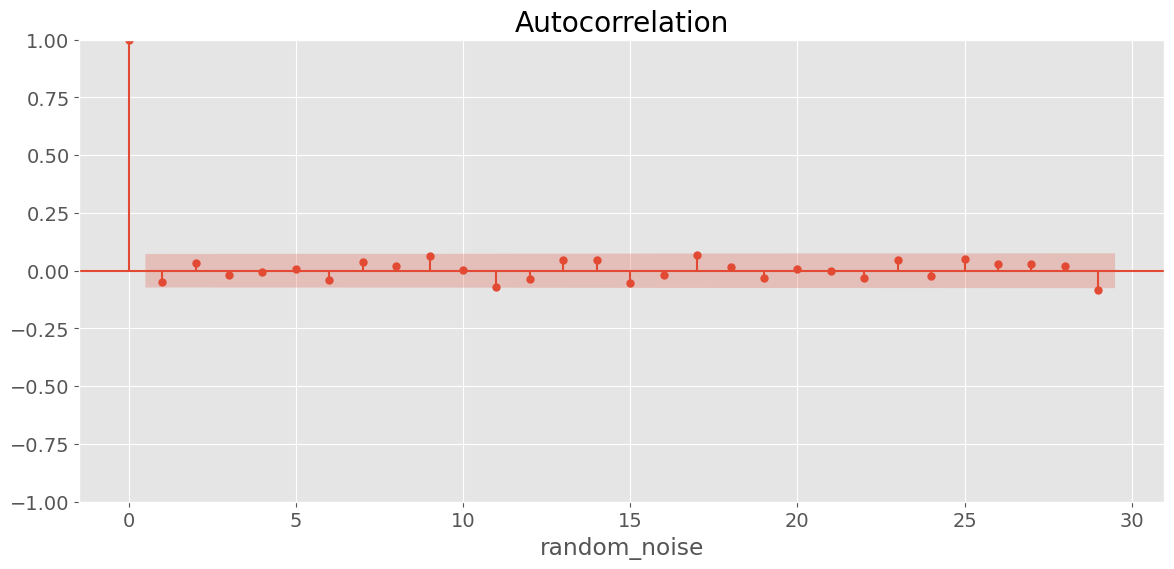

In [52]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_rem['random'])
plt.xlabel('random_noise');

### Determine _Partial_ Autocorrelation

c:\Users\helge\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



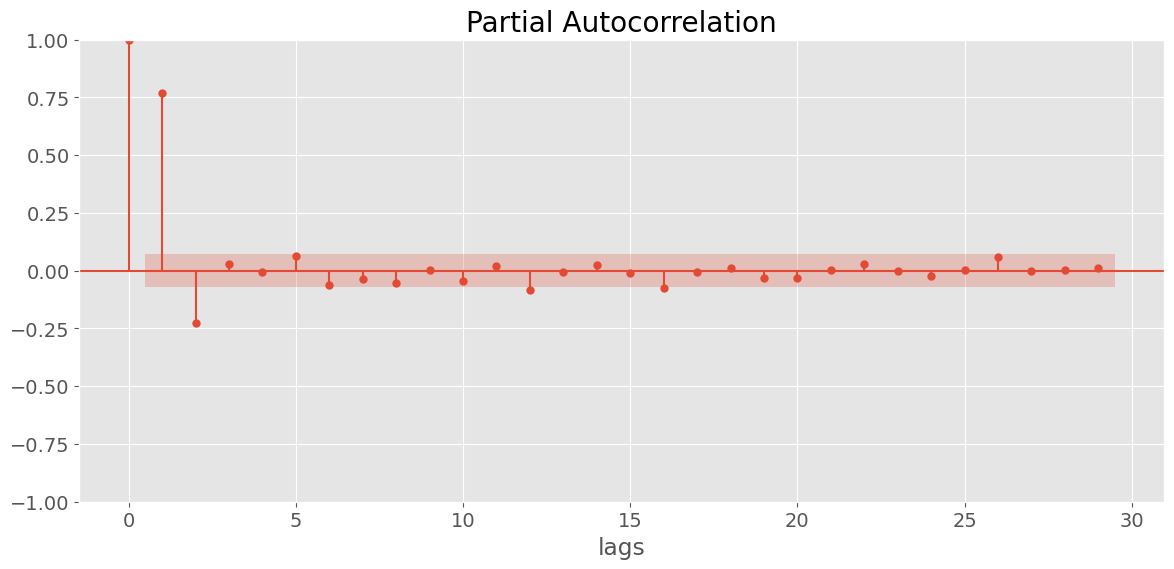

In [53]:
# Statsmodels provides a function called plot_pacf
# plot partial autocorrelation function
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_rem['remainder'])
plt.xlabel('lags');

In [54]:
from statsmodels.tsa.ar_model import ar_select_order
lags_order = ar_select_order(df_rem['remainder'], maxlag=5)

c:\Users\helge\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\helge\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [55]:
lags_order.ar_lags

[1, 2]

In [56]:
lags_order.bic

{(1, 2): 3193.7461556323487,
 (1, 2, 3): 3198.3474854142664,
 (1, 2, 3, 4): 3204.6606775735636,
 (1, 2, 3, 4, 5): 3207.4350406167205,
 (1,): 3232.3641198056057,
 0: 3886.8866749005692}

### OLS Regression

#### on Xtrain_tran

In [ ]:
# Create a list of features
forward_features = []

# Original features
feature_list = Xtrain_tran.columns

In [ ]:
feature_list

In [ ]:
possible_models = pd.DataFrame(columns=['features', 'p', 'r2'])
# Run a linear regression separately on each of the features

In [ ]:
while len(feature_list) > 0:
    forward_selection = pd.DataFrame(columns=['features', 'p', 'r2'])
    for feature in feature_list:
        m_feature = OLS(ytrain, Xtrain_tran[forward_features + [feature]])
#         print(forward_features + [feature])
        result = m_feature.fit()
#         print(result.summary())
        forward_selection = forward_selection.append({
                                    'feature': feature
                                  , 'features': forward_features + [feature]
                                  , 'p': result.pvalues.loc[feature]
                                  , 'r2': result.rsquared}
                                  , ignore_index=True)

    # p > 0.05 -> not significant
    # p <= 0.05 significant
    # p <= 0.01 very significant
    # p <= 0.001 highly significant

    if forward_selection.sort_values('p').iloc[0].p < 0.05:
        print(forward_selection.sort_values('p').iloc[0].features)
        best_feature = forward_selection.sort_values('p').iloc[0].feature
        forward_features.append(best_feature)
        feature_list = feature_list.drop(best_feature)
        best_model = forward_selection[forward_selection['feature']==best_feature]
        possible_models = possible_models.append(best_model, ignore_index=True)

    else:
        break

In [ ]:
result.summary()